<a href="https://colab.research.google.com/github/datakind/Mar21-synthetic-data/blob/main/synthetic_seed_compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from pathlib import Path
import os

In [ ]:

true_data = pd.read_csv('latestdata.csv')
synth_data = pd.read_csv('covid_xu_synth_data_v1_5000.csv')
synth_data.head(n = 100)

Total true data: 256382
Total synthetic data: 5000

The column name is age:
number of unique entries in the synthetic data: 32
number of unique entries in the seed data: 226
the missing synthetic data: 4944
synthetic numeric column missing data: 4963
the missing seed data: 234714
seed numeric column missing data: 237208

The column name is sex:
number of unique entries in the synthetic data: 3
number of unique entries in the seed data: 3
the missing synthetic data: 4940
synthetic numeric column missing data: 5000
the missing seed data: 234574
seed numeric column missing data: 256382
cant histogram

The column name is city:
number of unique entries in the synthetic data: 159
number of unique entries in the seed data: 2882
the missing synthetic data: 3099
synthetic numeric column missing data: 5000
the missing seed data: 107182
seed numeric column missing data: 256306
cant histogram

The column name is province:
number of unique entries in the synthetic data: 64
number of unique entries 

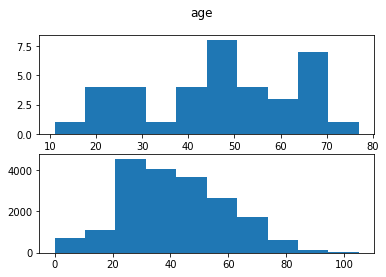

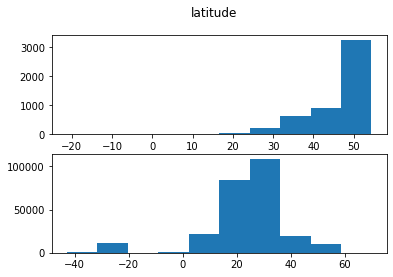

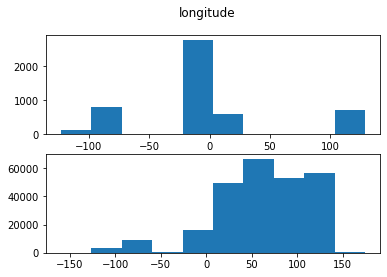

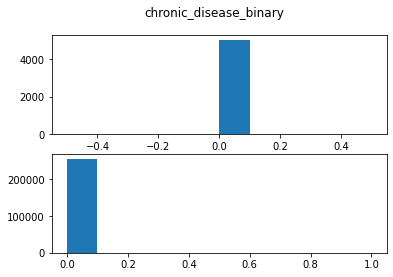

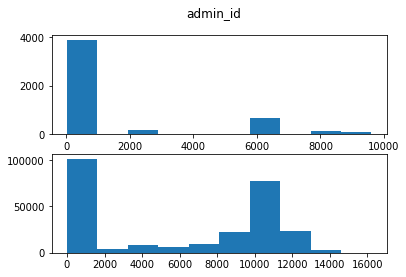

In [ ]:
col_list = true_data.columns
print('Total true data: ' + str(len(true_data)))
print('Total synthetic data: ' + str(len(synth_data)))

# possible terrible method

for data in col_list[1:33]:
  print('\nThe column name is ' + data + ':')
  col_data_synth = synth_data[data]

  na_synth = col_data_synth.isna().sum()
  col_data_true = true_data[data]
  na_true = col_data_true.isna().sum()
  synth_num = pd.to_numeric(col_data_synth, errors='coerce')
  true_num = pd.to_numeric(col_data_true, errors='coerce')
  print('number of unique entries in the synthetic data: '+ str(len(col_data_synth.unique()))   )
  print('number of unique entries in the seed data: ' +str(len(col_data_true.unique()))   )

  print('the missing synthetic data: ' + str(na_synth))
  print('synthetic numeric column missing data: ' +str(synth_num.isna().sum()))
  print('the missing seed data: ' + str(na_true))
  print('seed numeric column missing data: ' +str(true_num.isna().sum()))
  if (synth_num.isna().sum() != 5000):
    # if the column is not all nans, then you have a numeric object
    fig, axs = plt.subplots(2)
    fig.suptitle(data)
    axs[0].hist(synth_num)
    axs[1].hist(true_num)
  else:
    print('cant histogram')
  #print(col_data_synth.value_counts())
  #print(col_data_true.value_counts())


#set(synth_data) & set(true_data)

No handles with labels found to put in legend.


853
['United States' 'China' 'Belgium' 'United Kingdom' 'Portugal'
 'South Korea' 'Canada' nan]


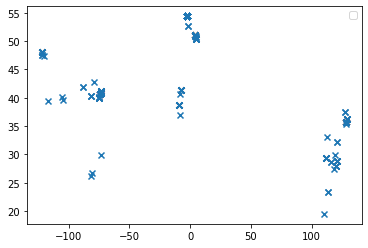

In [ ]:
## cross correlations between columns.

#compare age and gender
var1 = 'longitude'
var2 = 'latitude'
df2 = synth_data.loc[synth_data['country'] == 'South Korea']
print(len(df2))

s1_f = pd.to_numeric(df2[var1])
s1_m = pd.to_numeric(df2[var2])

countries = synth_data['country'].unique()
print(countries)


plt.scatter(s1_f,s1_m,marker="x")
plt.legend()
plt.show()



